In [109]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

In [110]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

# 1.) Estimating the Coefficients and Intercepts of Logistic Regression

In [111]:
X_log = np.linspace(0.01,0.99,99)
print(X_log[:5], '...', X_log[-5:])

[0.01 0.02 0.03 0.04 0.05] ... [0.95 0.96 0.97 0.98 0.99]


In [112]:
y_log = np.log(X_log)

Text(0.5, 1.0, 'Natural logarithm')

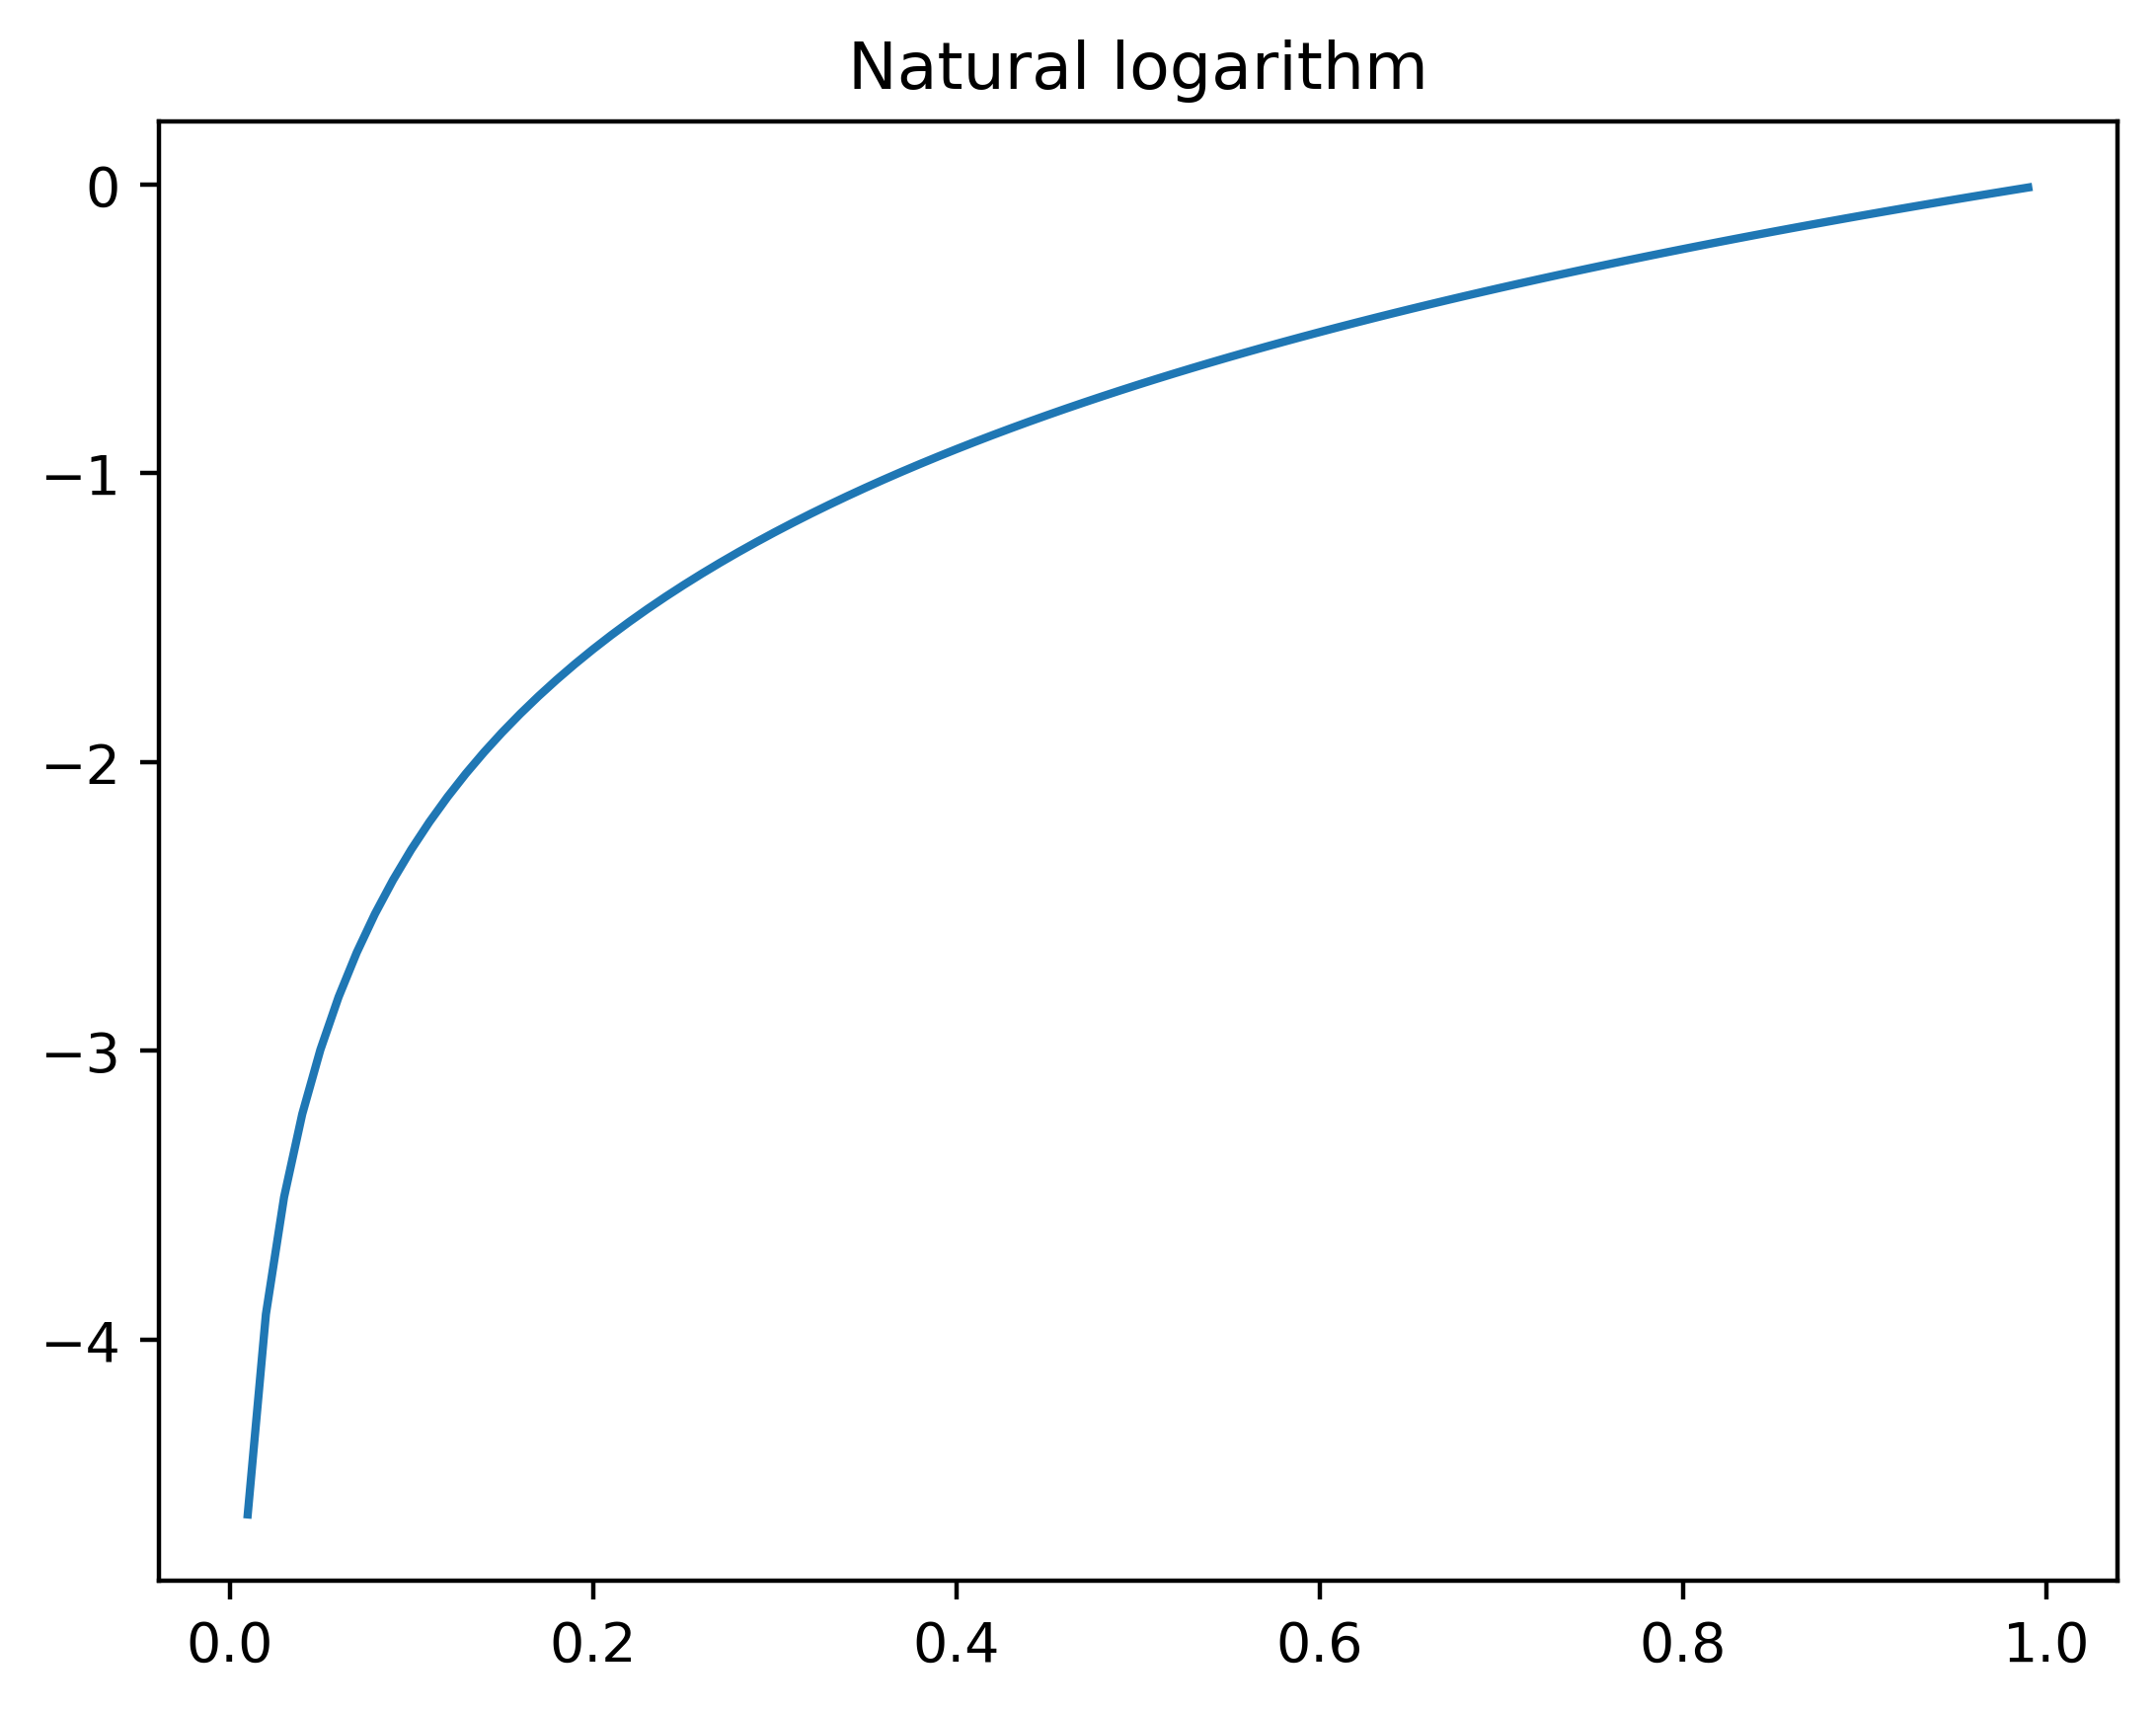

In [113]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.plot(X_log, y_log)
plt.title('Natural logarithm')

# 2.) Gradient Descent to Find Optimal Parameter Values

#Using Gradient Descent to Minimize a Cost Function

In [7]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


In [115]:
def cost_function(X):
    return X * (X-2)

In [116]:
y_poly = cost_function(X_poly)

Text(0.5, 1.0, 'Error surface')

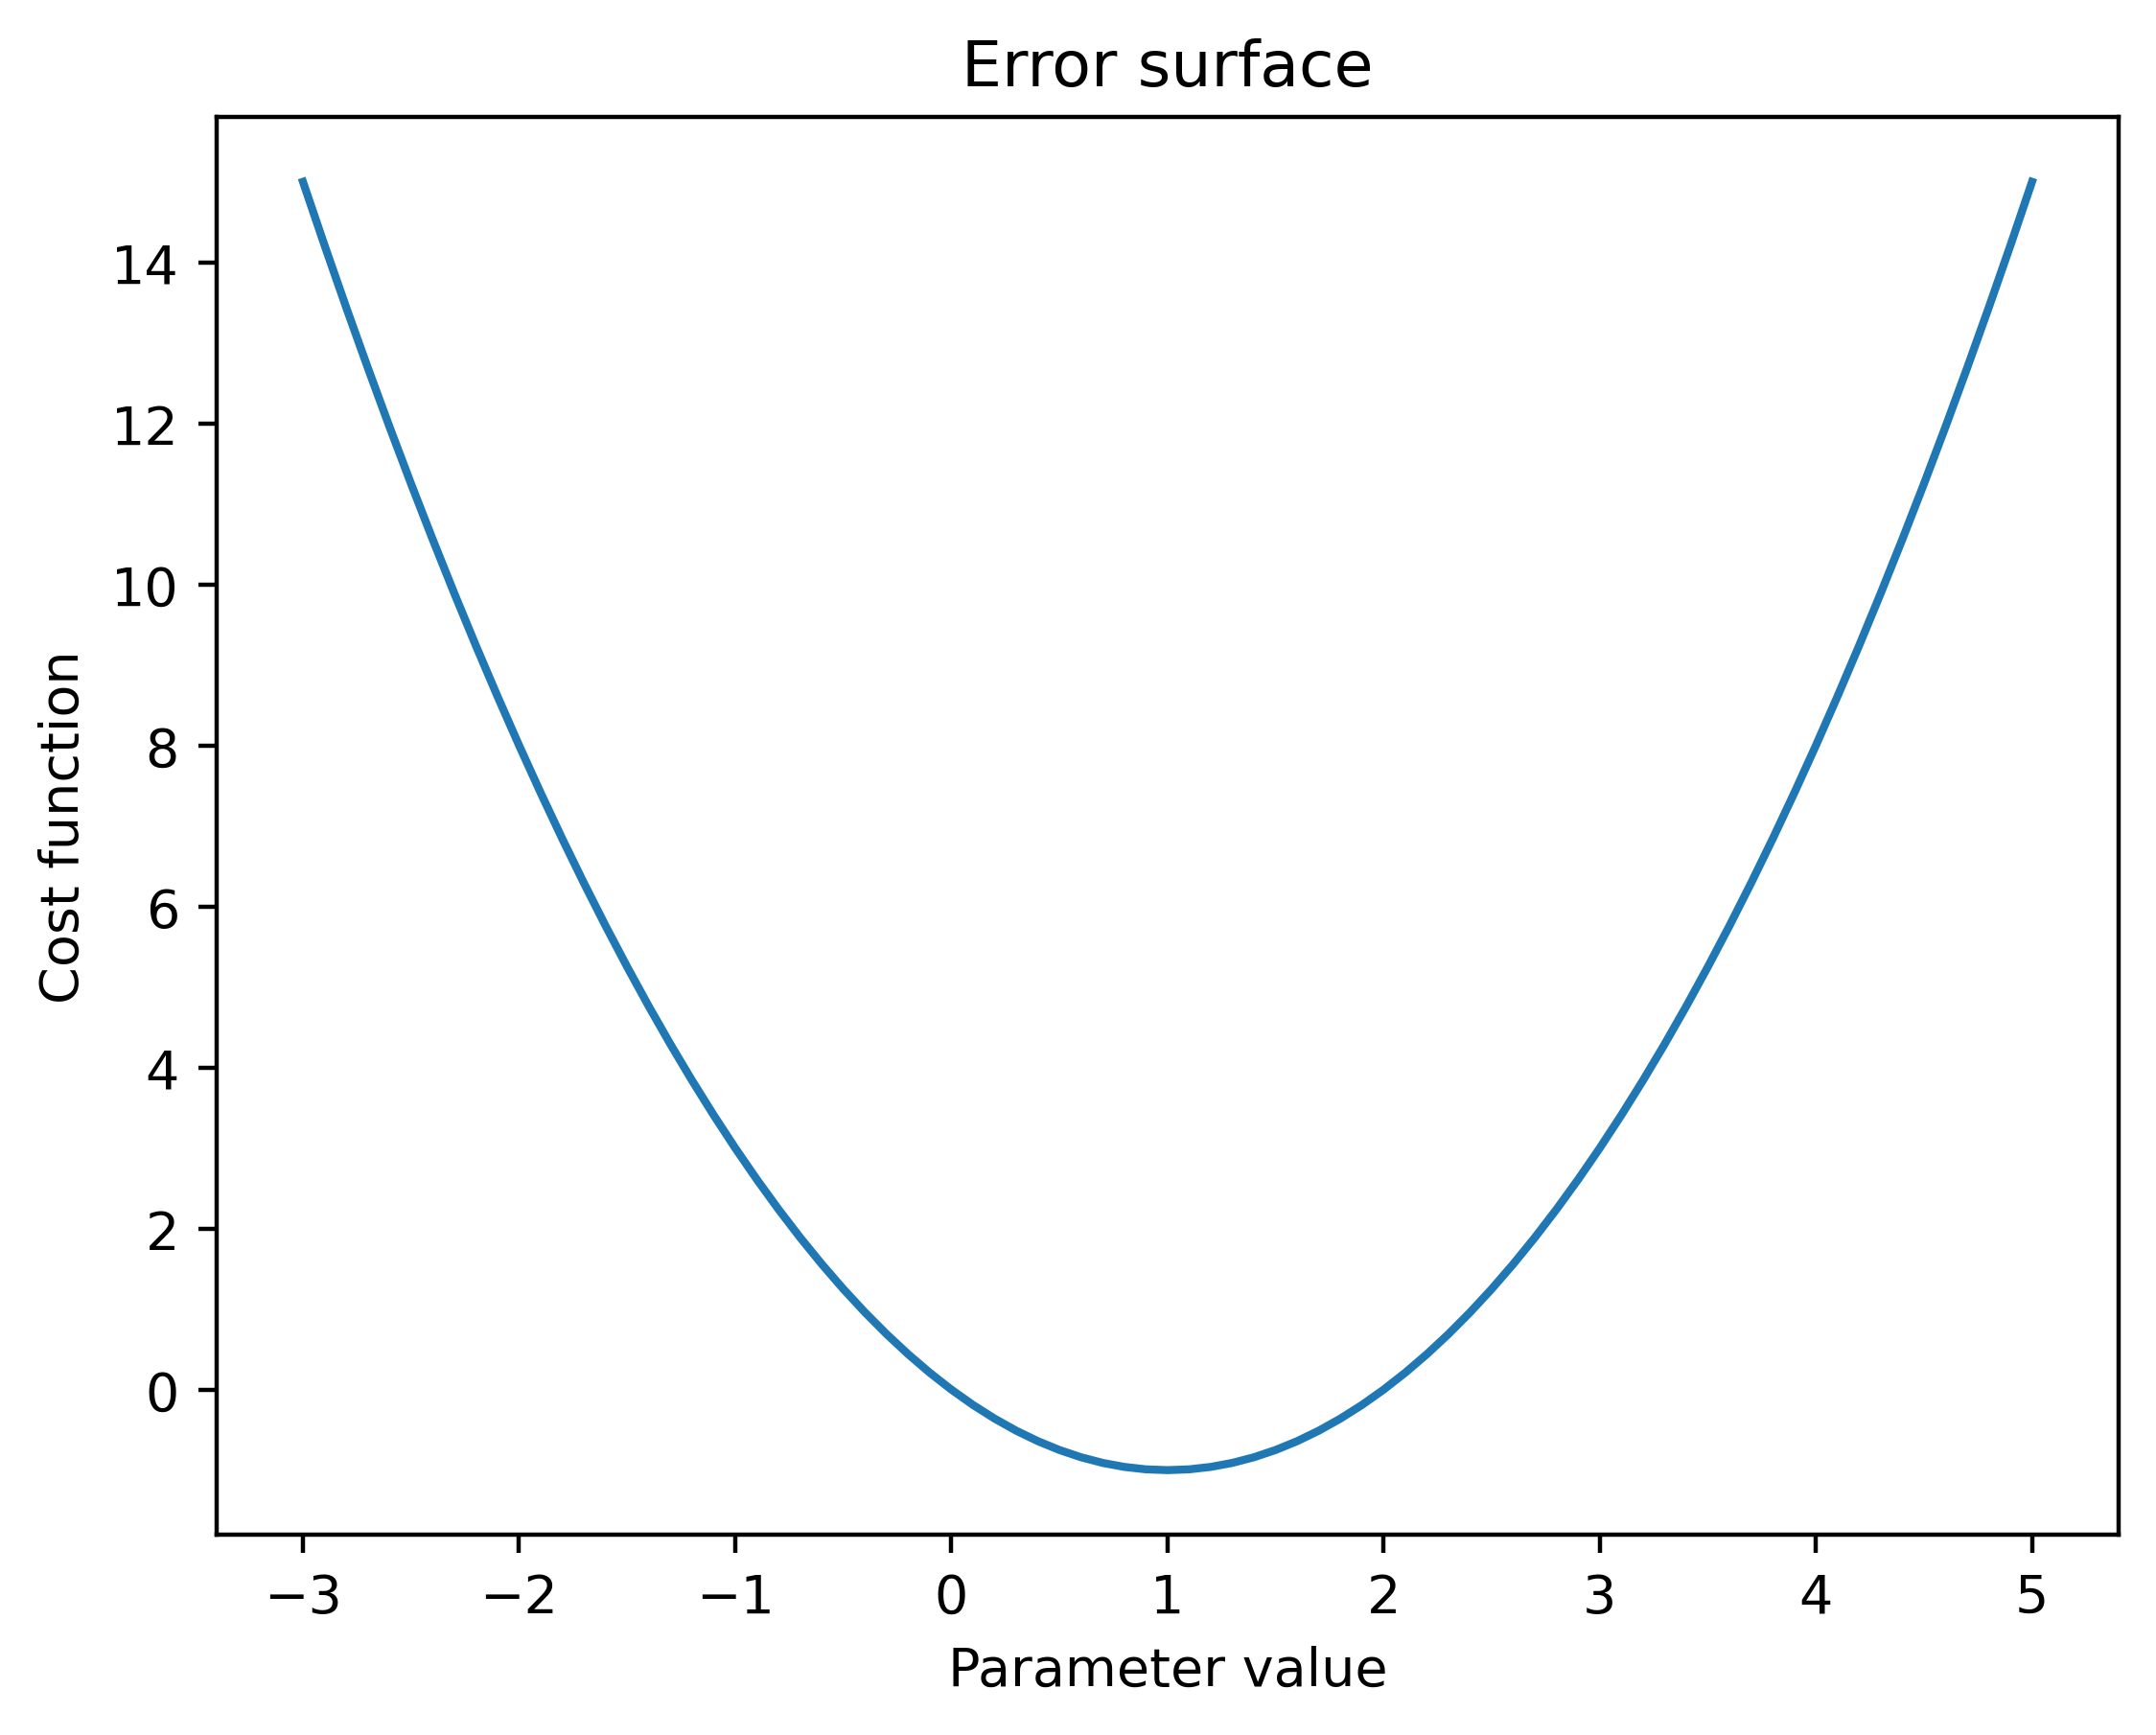

In [117]:
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

In [118]:
def gradient(X):
    return (2*X) - 2

In [13]:
x_start = 4.5

In [138]:
learning_rate = 0.4

In [139]:
x_next = x_start - gradient(x_start)*learning_rate
x_next

1.6999999999999997

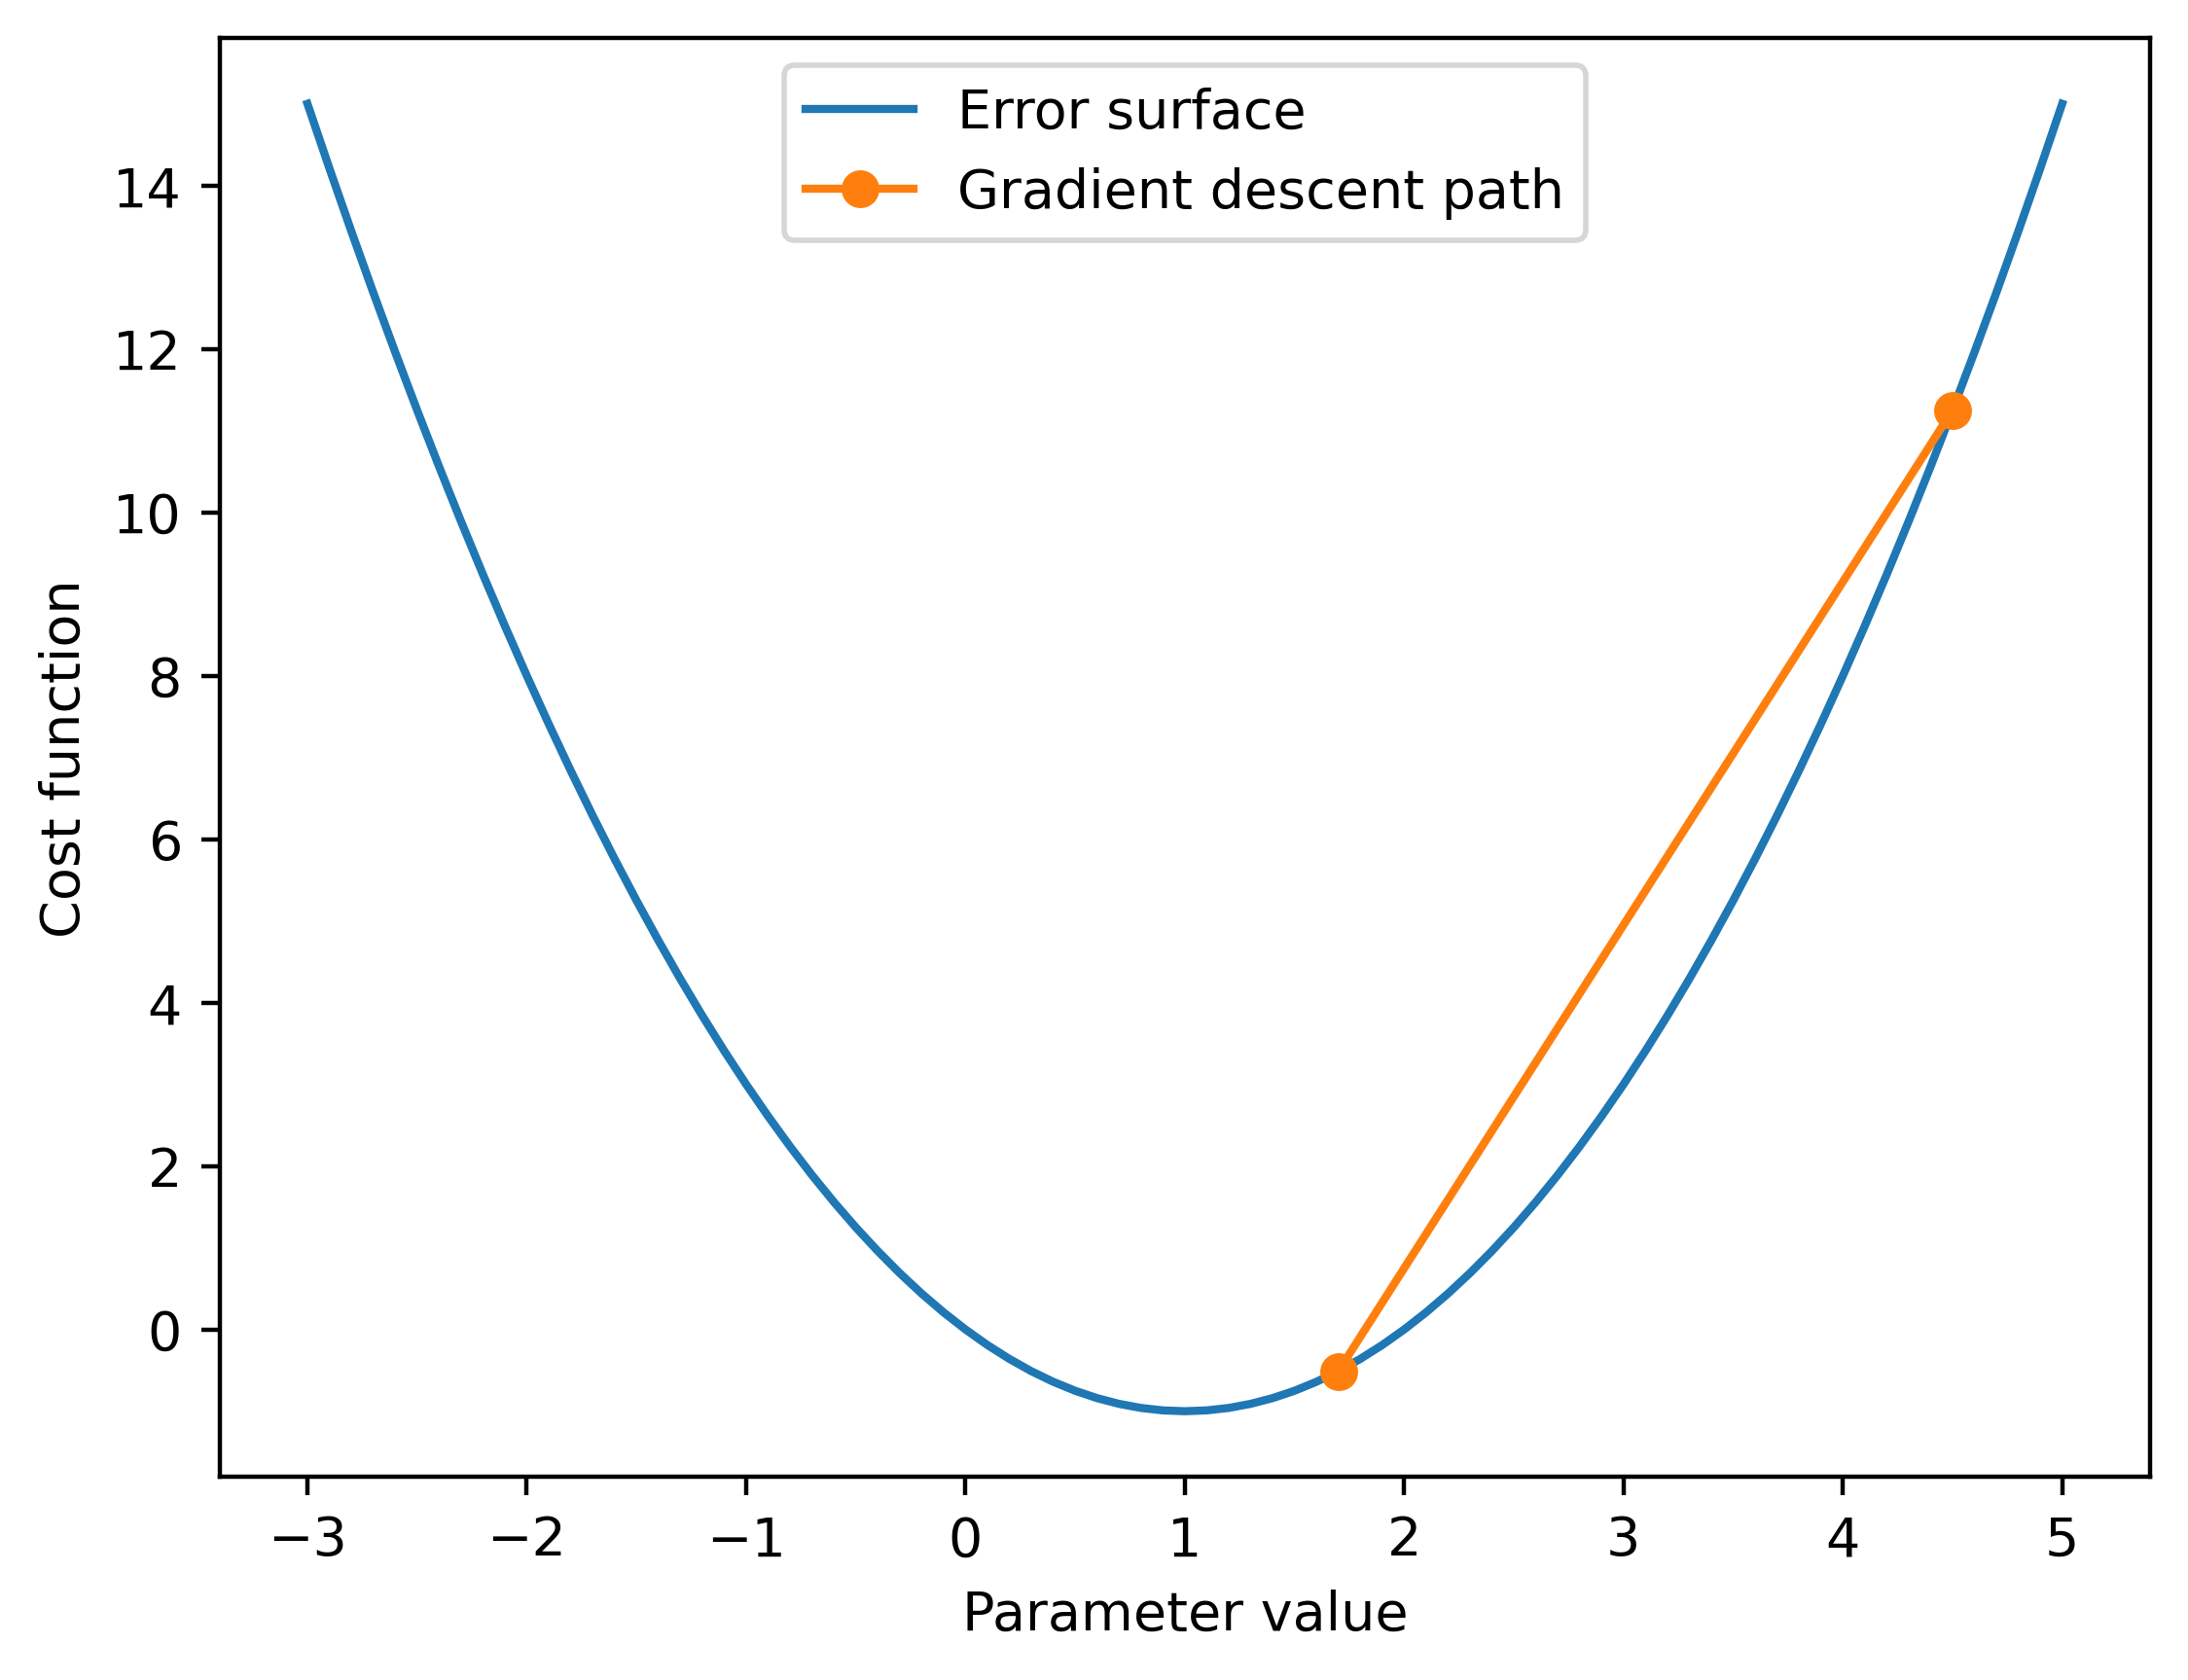

In [140]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

In [133]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)

In [136]:
x_path

array([ 4.5000e+00, -6.0000e+00,  1.5000e+01, -2.7000e+01,  5.7000e+01,
       -1.1100e+02,  2.2500e+02, -4.4700e+02,  8.9700e+02, -1.7910e+03,
        3.5850e+03, -7.1670e+03,  1.4337e+04, -2.8671e+04,  5.7345e+04])

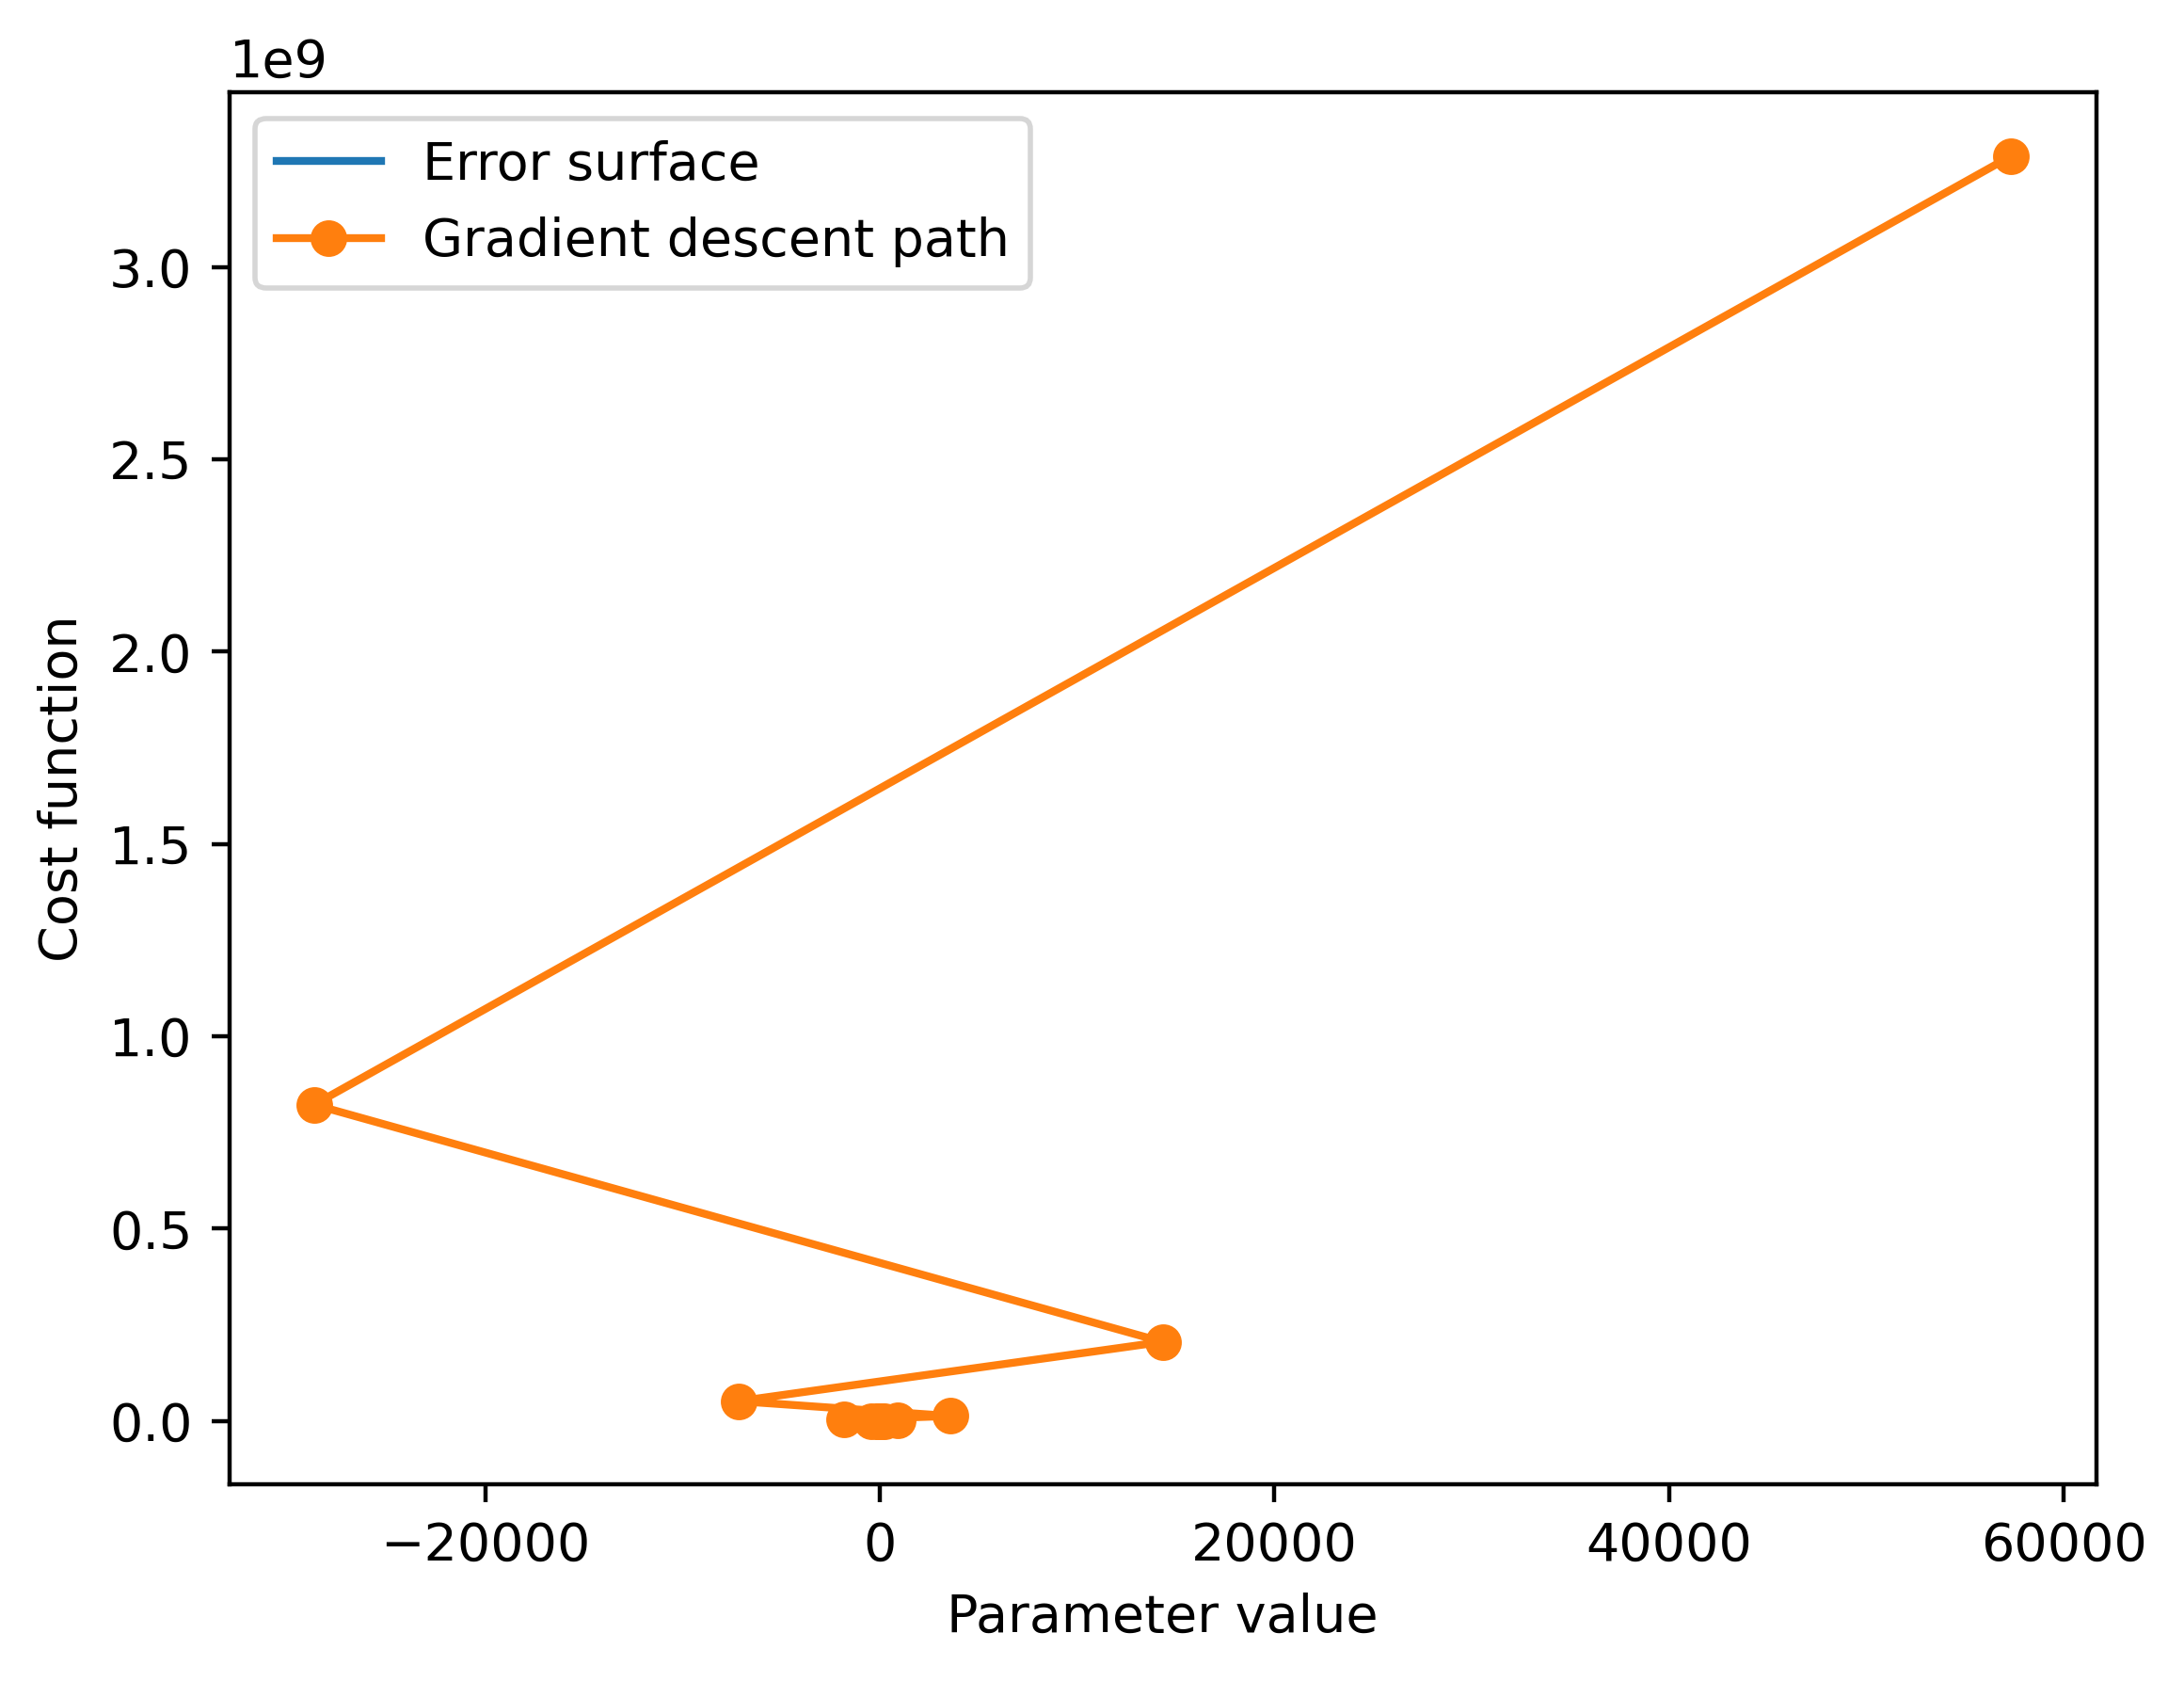

In [137]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

# 3.) The Motivation for Regularization: the Bias-Variance Trade-off

Generate quadratic data with random noise to illustrate this.

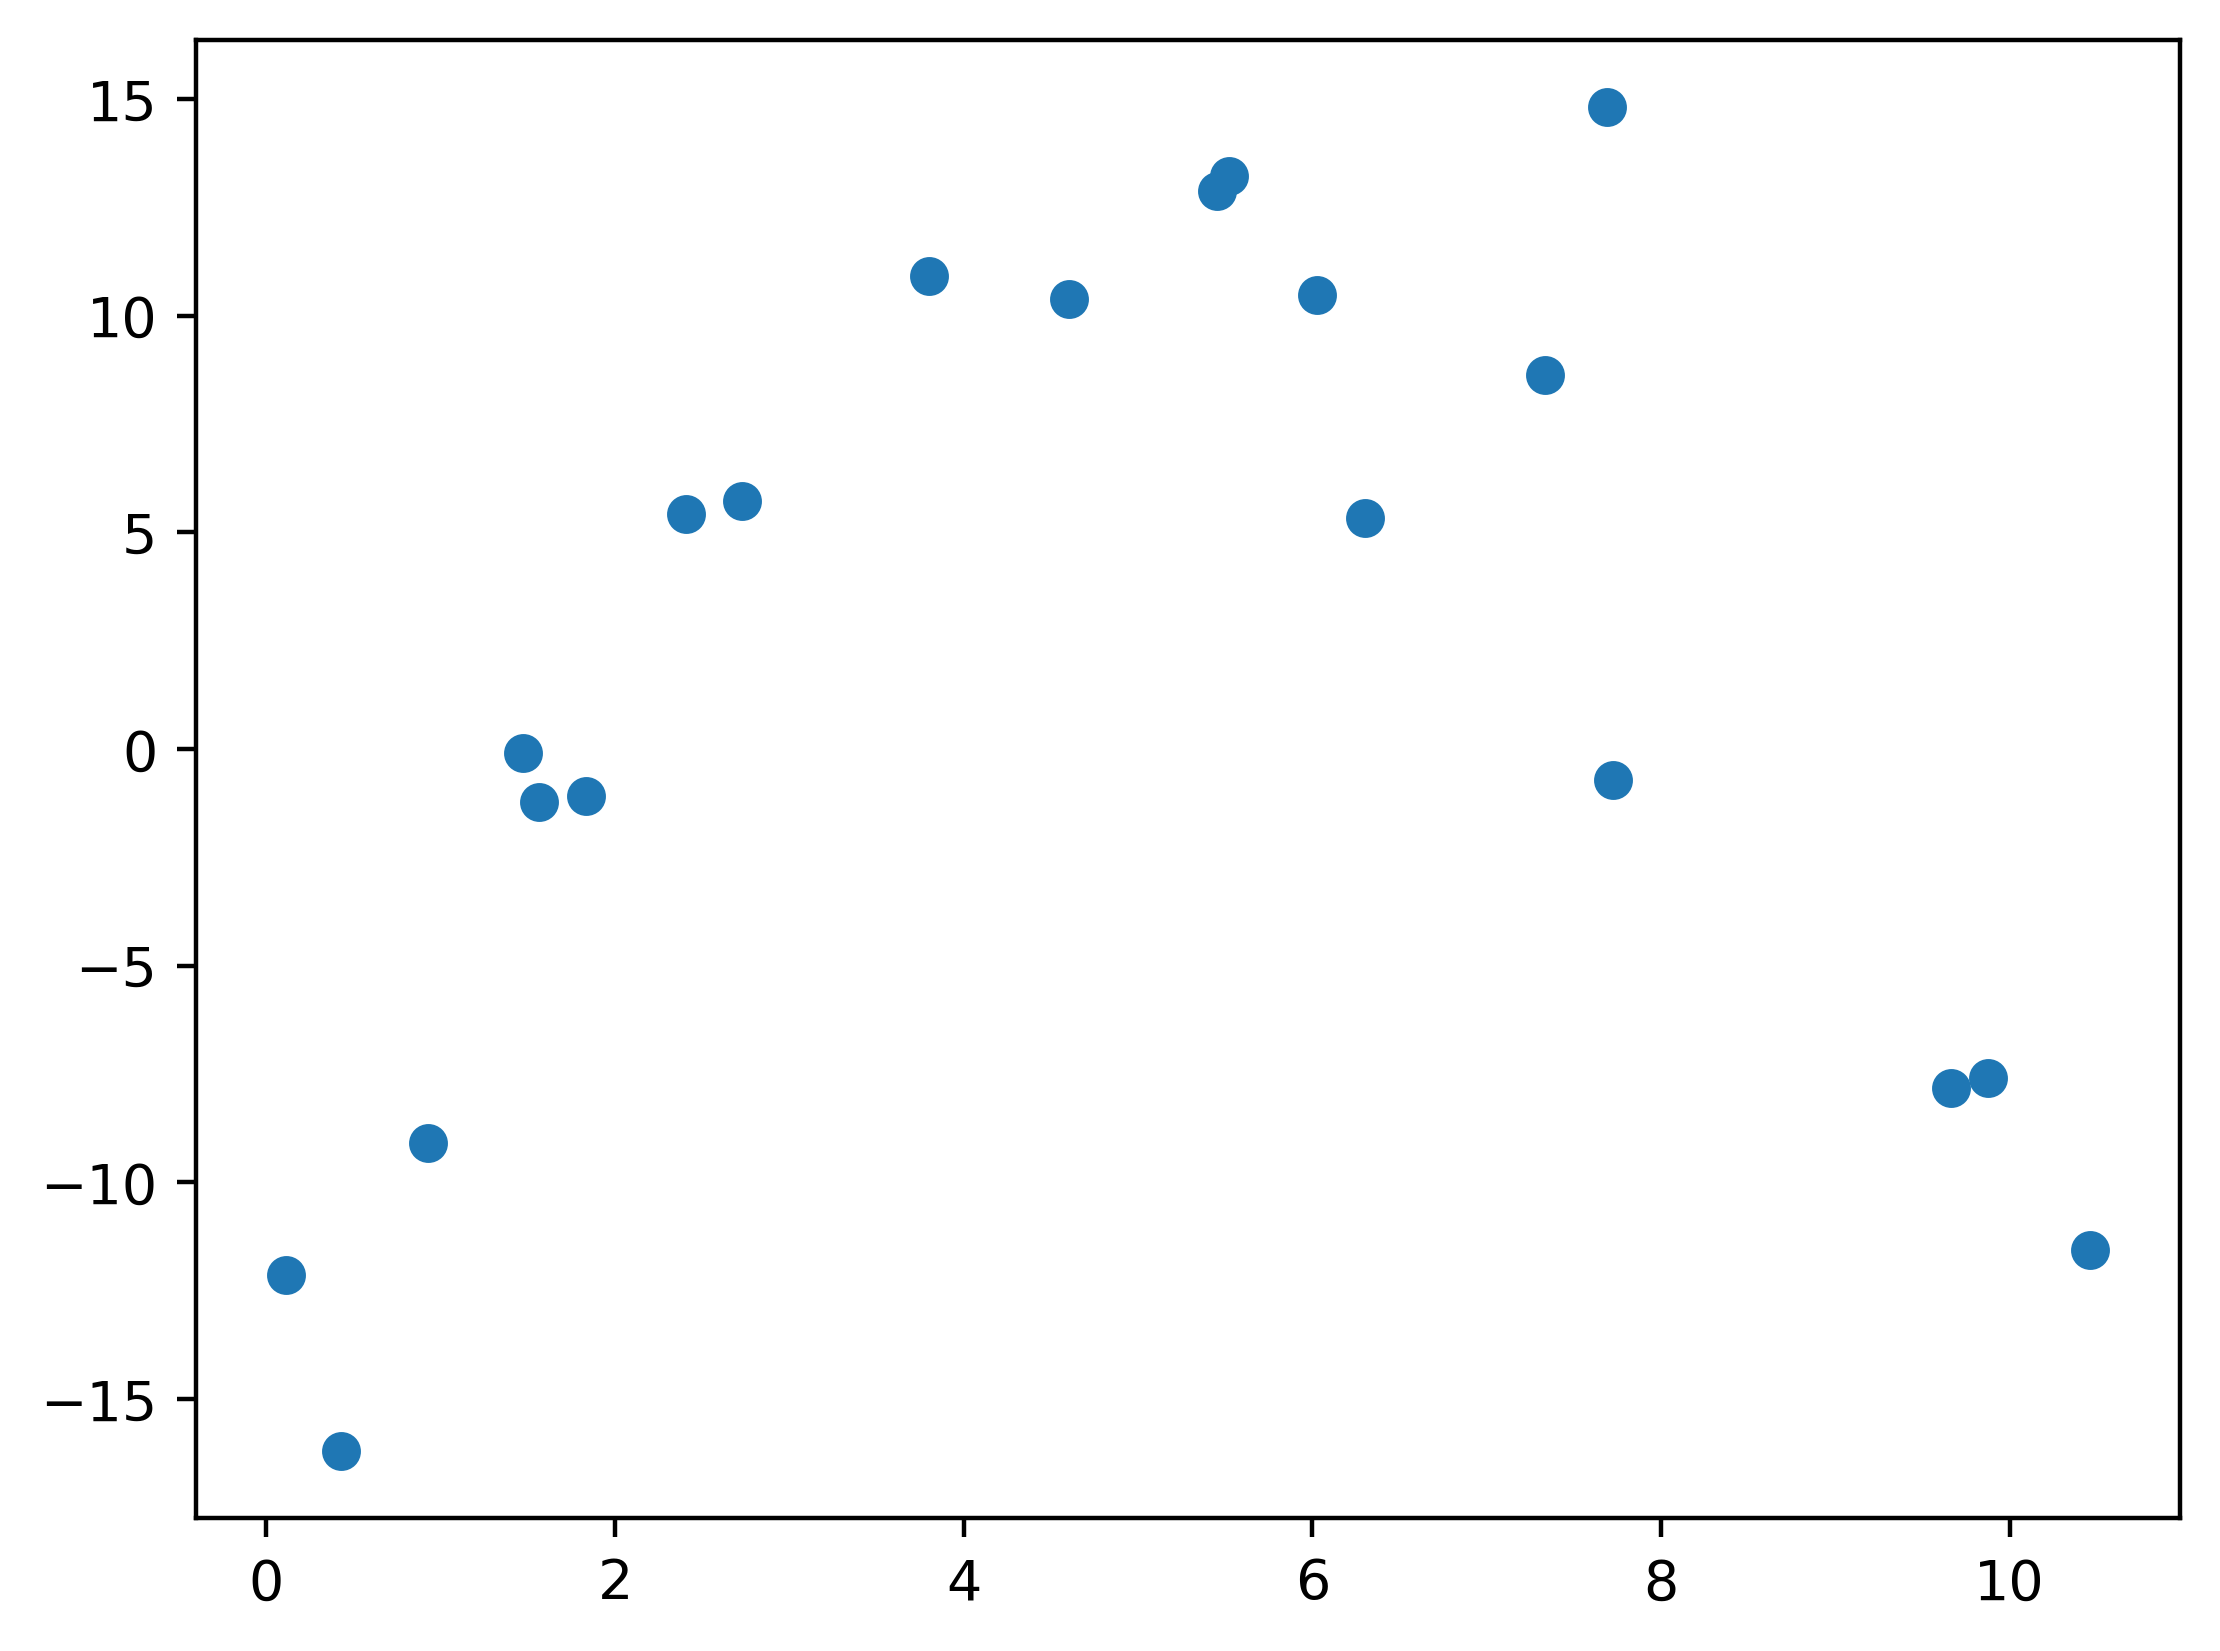

In [123]:
np.random.seed(seed=9)
n_points = 20
X = np.random.uniform(0, 11, n_points)
X = np.sort(X)
Y = (-X+2) * (X-9) + np.random.normal(0, 3, n_points)
plt.scatter(X, Y)

In [124]:
lin_fit = np.polyfit(X, Y, 1)

Function to take in the polynomial coefficients and produce the y values

In [125]:
def poly_fun(X, p):
    Y = np.zeros_like(X)
    power = len(p)-1
    for coefficient in p:
        Y = Y + coefficient*X**power
        power = power - 1
    return Y

In [126]:
lin_fit

array([ 0.44464616, -0.61869372])

In [127]:
poly_fun(X,lin_fit)

array([-0.56795261, -0.42917123, -0.2075489 ,  0.03588094,  0.07638692,
        0.19702737,  0.45030033,  0.59479584,  1.07117738,  1.42827491,
        1.80618691,  1.83602902,  2.06083994,  2.18273629,  2.64318106,
        2.8007159 ,  2.81695454,  3.67843349,  3.77355591,  4.03257388])

Plot the models over a more continuous range of values

In [128]:
curve_x = np.linspace(0,11,333)

In [129]:
cmap = mpl.cm.get_cmap('tab10')

(-20.0, 20.0)

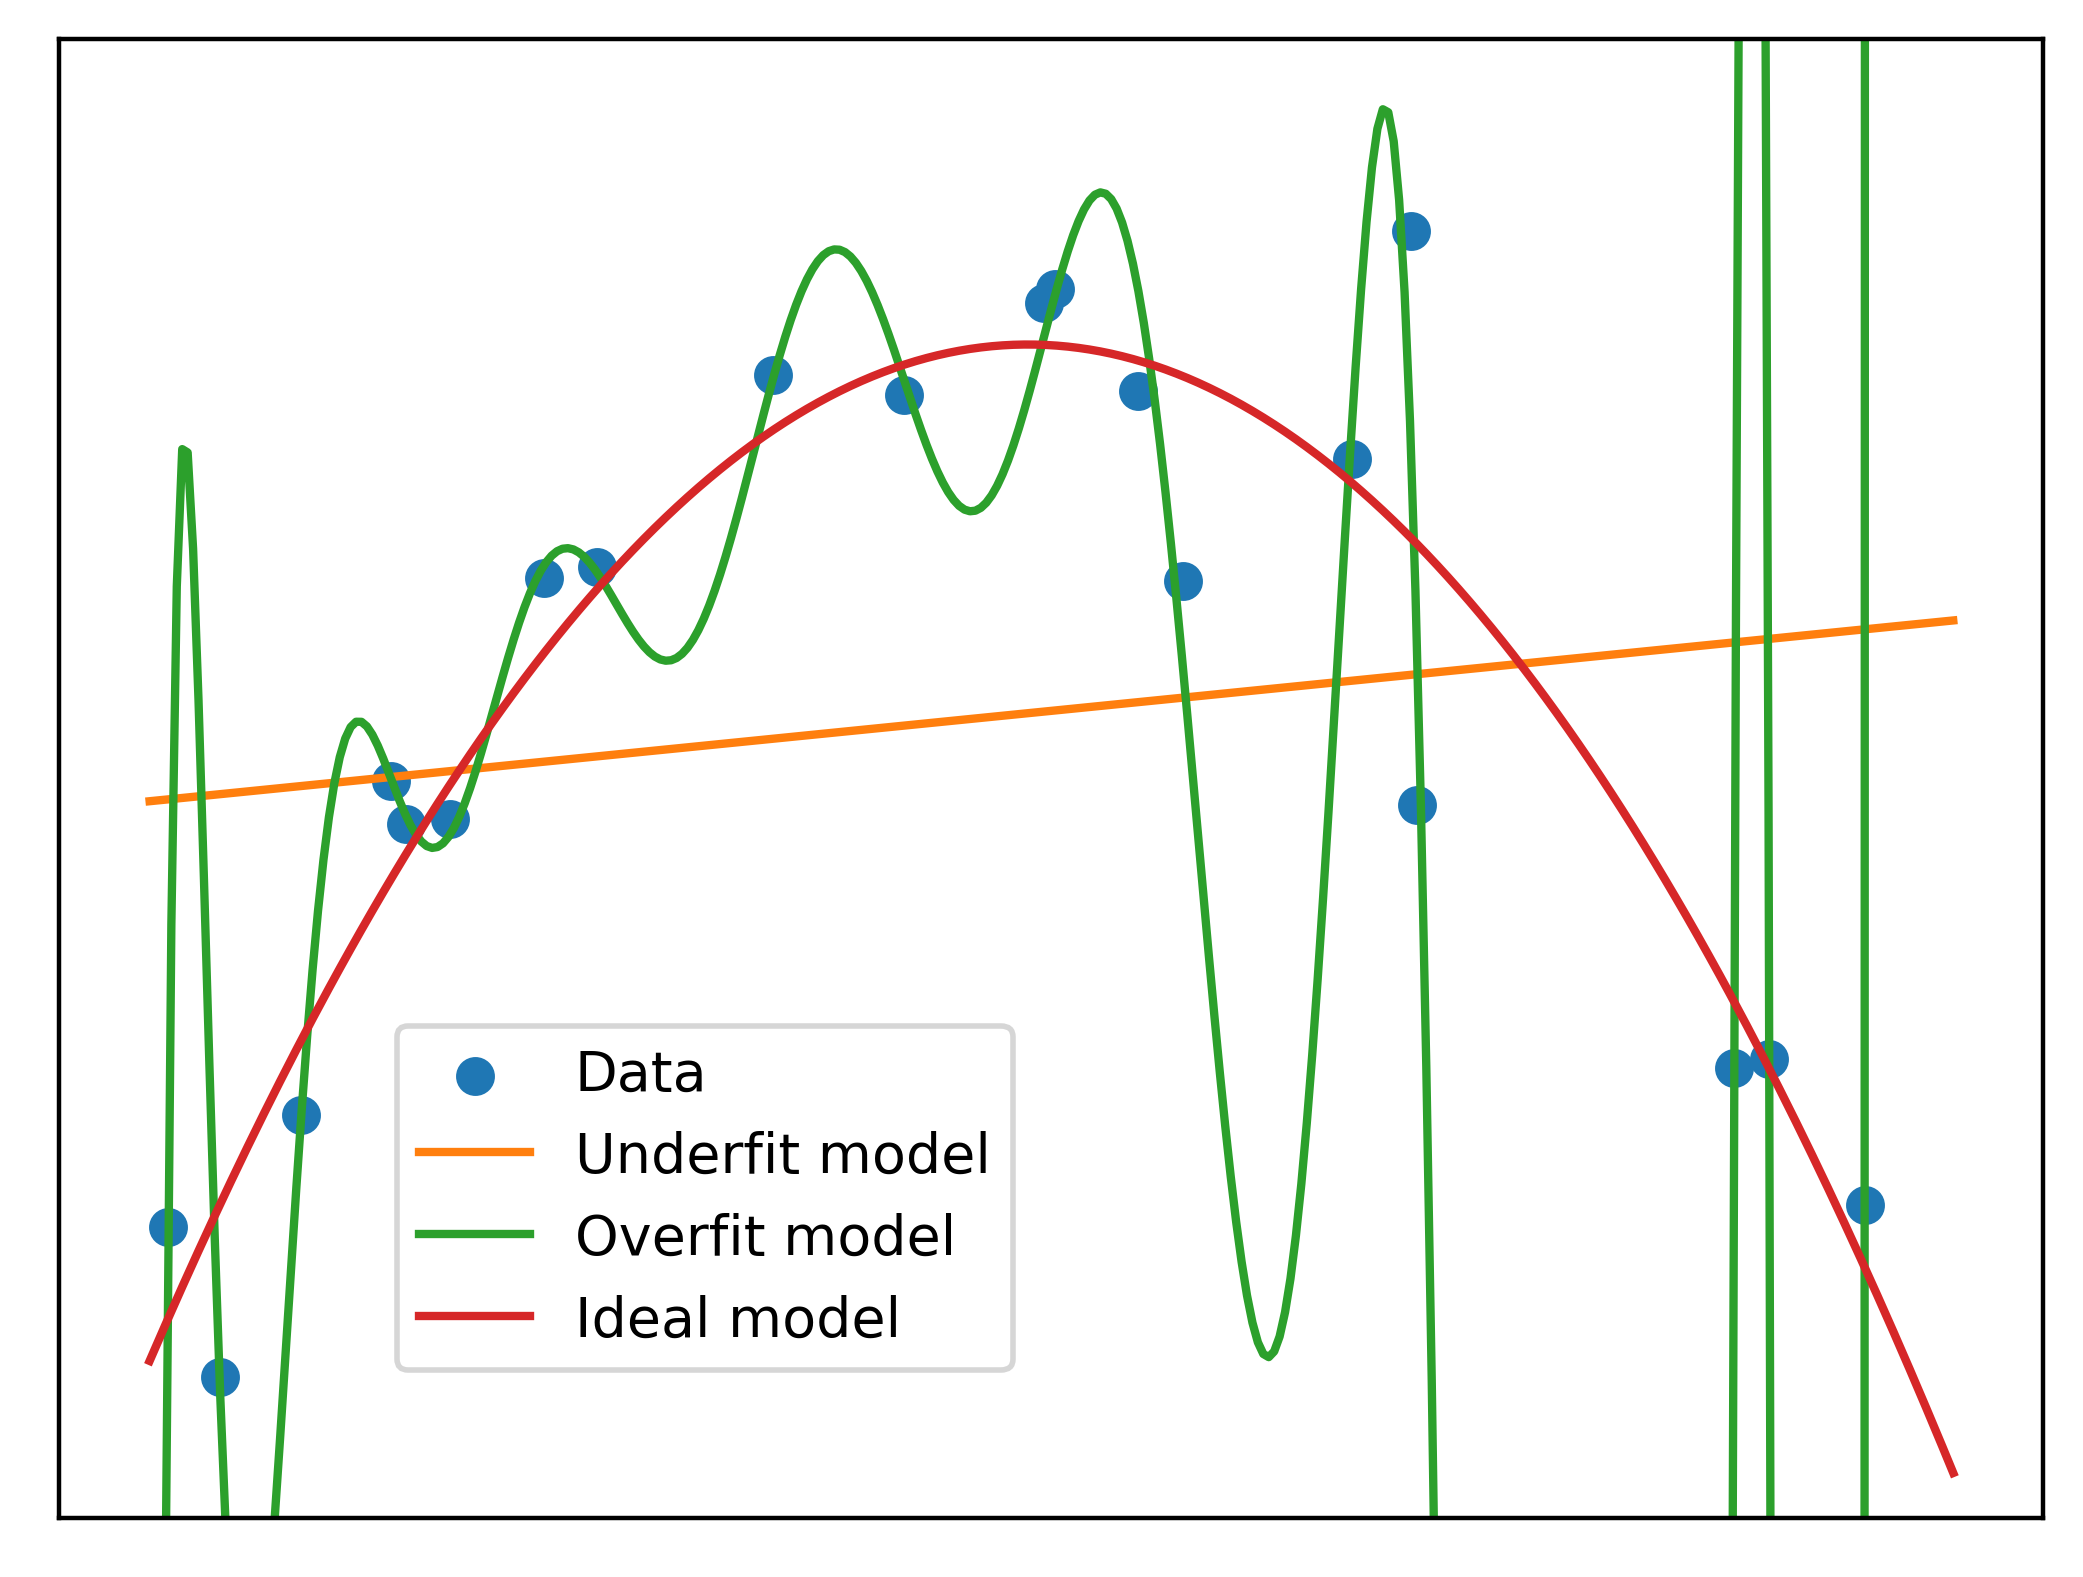

In [78]:
plt.scatter(X, Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x,lin_fit), label='Underfit model', color=cmap(1))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 2)), label='Ideal model', color=cmap(3))
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])